In [4]:
import os
import re
import cv2
# import pillow

In [5]:
ORGN = '../seed-pack2_resized'

In [6]:
fnames = sorted(os.listdir(ORGN))

In [15]:
date_list = []
root_list = []
for fname in fnames:
    date = re.findall('_(\d+).', fname)[0]
    root = re.findall('(.+)_', fname)[0]
    if date not in date_list:
        date_list.append(date)
    if root not in root_list:
        root_list.append(root)

In [16]:
date_list

['211122', '211124', '211126', '211127', '211129']

In [20]:
root_list[:5]

['138+P-1', '138+P-3', '138+P-4', '138+P-5', '138-P-1']

In [21]:
len(date_list)*len(root_list)

195

In [123]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict

cmaps = OrderedDict()

cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

cmap=plt.get_cmap('gist_ncar')

color_list = []
for i in range(4):
    color_list.append([int(c*255) for c in cmap((3-i) * 60)[:3]])

color_list = [[255, 255, 255]] + color_list

color_list[-1] = [128, 0, 128]
color_list

color_dic= dict([(date, color) for date, color in zip(date_list, color_list)])

color_dic

{'211122': [255, 255, 255],
 '211124': [255, 47, 0],
 '211126': [182, 255, 55],
 '211127': [0, 252, 202],
 '211129': [128, 0, 128]}

## 色のキャプション作成

In [114]:
from PIL import Image
from PIL import ImageDraw

In [115]:
from PIL import ImageFont

def add_text_to_image(img, text, font_path, font_size, font_color, height, width, max_length=740):
    position = (width, height)
    font = ImageFont.truetype(font_path, font_size)
    draw = ImageDraw.Draw(img)
    if draw.textsize(text, font=font)[0] > max_length:
        while draw.textsize(text + '…', font=font)[0] > max_length:
            text = text[:-1]
        text = text + '…'

    draw.text(position, text, font_color, font=font)

    return img

In [118]:
img = Image.new("RGB", (90*4, 105*4), (130, 130, 130))
draw = ImageDraw.Draw(img)

blk = (0, 0, 0)
for i in range(5):
    date = date_list[i]
    color = tuple(color_list[i])
    draw.ellipse((10*4, (5 + i*20)*4, 25*4, (20 + i*20)*4), fill=(color))
    img = add_text_to_image(img, date[2:], font_path, 10*4, blk, 35 + i*20*4, 50*4)

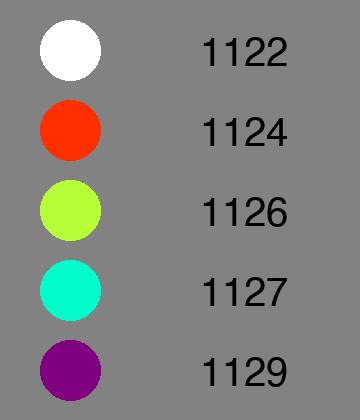

In [119]:
img

In [120]:
font_path = "/System/Library/Fonts/Helvetica.ttc"
caption = img

In [121]:
def pil2cv(image):
    ''' PIL型 -> OpenCV型 '''
    new_image = np.array(image, dtype=np.uint8)
    if new_image.ndim == 2:  # モノクロ
        pass
    elif new_image.shape[2] == 3:  # カラー
        new_image = cv2.cvtColor(new_image, cv2.COLOR_RGB2BGR)
#             continue
    elif new_image.shape[2] == 4:  # 透過
        new_image = cv2.cvtColor(new_image, cv2.COLOR_RGBA2BGRA)
    return new_image

In [122]:
caption_ = pil2cv(caption)

In [124]:
cv2.imwrite('../caption.png', caption_)

True